# Prediction of CO2 Emission per Country
### Pappo, Katz, Pimenta Silva, Tuncel

## Importing and Downloading

In [52]:
import numpy as np
import pandas as pd

In [53]:
df_CO2_brut = pd.read_csv('data/GCB2022v27_MtCo2_flat.csv')
# df_CO2

In [54]:
df_GEI_brut = pd.read_csv('data/Global Economy Indicators.csv')
# df_GEI_brut

## Cleaning the datasets

In [75]:
# Drop rows where year is less than 1970
df_CO2 = df_CO2_brut.drop(df_CO2_brut[df_CO2_brut['Year'] < 1970].index)

df_CO2 = df_CO2.drop(columns=['ISO 3166-1 alpha-3'])

# Replace NaN values with 0
df_CO2 = df_CO2.replace(np.nan, 0)

# Delete spaces in column names
df_CO2.columns = df_CO2.columns.str.strip()

df_CO2['Country'] = df_CO2['Country'].replace({
    'USA': 'United States of America', 
    "Côte d'Ivoire": "Ivory Coast",
    'Congo': 'Republic of the Congo',
    'Viet Nam': 'Vietnam',
    'Tanzania': 'United Republic of Tanzania',
})

df_CO2.reset_index(drop=True, inplace=True)
# df_CO2.head()

In [76]:
# Drop columns that are not needed
df_GEI = df_GEI_brut.drop(columns=[
    ' Currency ',
    ' AMA exchange rate ', 
    ' IMF based exchange rate ', 
    ' Changes in inventories ', 
    ' Other Activities (ISIC J-P) '])

# Delete spaces in column names
df_GEI.columns = df_GEI.columns.str.strip()

# Delete spaces in Country names
df_GEI['Country'] = df_GEI['Country'].str.strip()

# Replace some country names
df_GEI['Country'] = df_GEI['Country'].replace({
    'United States': 'United States of America', 
    'Russian Federation': 'Russia',
    'Venezuela (Bolivarian Republic of)': 'Venezuela',
    'D.R. of the Congo': 'Democratic Republic of the Congo',
    'Congo': 'Republic of the Congo',
    'Bolivia (Plurinational State of)': 'Bolivia',
    'Türkiye': 'Turkey',
    'U.R. of Tanzania: Mainland': 'Tanzania',
    'Iran (Islamic Republic of)': 'Iran',
    "Lao People's DR": 'Laos',
    'Viet Nam': 'Vietnam',
    'D.P.R. of Korea': 'North Korea',
    'Republic of Korea': 'South Korea',
    "Côte d'Ivoire": "Ivory Coast",
    'U.R. of Tanzania: Mainland': 'United Republic of Tanzania',
})


df_GEI.reset_index(drop=True, inplace=True)

# Rename columns
df_GEI.rename(columns={
    'Agriculture, hunting, forestry, fishing (ISIC A-B)': 'Agriculture & Fishing',
    'Construction (ISIC F)': 'Construction',
    'Exports of goods and services': 'Exports',
    'Final consumption expenditure': 'Final Consumption',
    'General government final consumption expenditure': 'Gov. Consumption',
    'Gross capital formation': 'Gross Capital Formation',
    'Gross fixed capital formation (including Acquisitions less disposals of valuables)': 'Gross Fixed Capital',
    'Household consumption expenditure (including Non-profit institutions serving households)': 'Household Consumption',
    'Imports of goods and services': 'Imports',
    'Manufacturing (ISIC D)': 'Manufacturing',
    'Mining, Manufacturing, Utilities (ISIC C-E)': 'Mining & Utilities',
    'Total Value Added': 'Total Value Added',
    'Transport, storage and communication (ISIC I)': 'Transport & Comm.',
    'Wholesale, retail trade, restaurants and hotels (ISIC G-H)': 'Wholesale & Retail',
    'Gross National Income(GNI) in USD': 'GNI (USD)',
    'Gross Domestic Product (GDP)': 'GDP',
    'Total': 'Total'
}, inplace=True)

# Fill NaN values with the mean of the column
# for col in df_GEI.columns: print(f'{col}: {df_GEI[col].isnull().mean() * 100:.2f}% null')
for col in df_GEI.columns: df_GEI[col] = df_GEI[col].fillna("NA" if df_GEI[col].dtype == 'O' else df_GEI[col].mean())

# df_GEI.head()

### Merging Datasets

In [77]:
# Merge the two dataframes on 'Country' and 'Year'
df = df_GEI.merge(df_CO2, on=['Country', 'Year'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9631 entries, 0 to 9630
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CountryID                9631 non-null   int64  
 1   Country                  9631 non-null   object 
 2   Year                     9631 non-null   int64  
 3   Population               9631 non-null   int64  
 4   Per capita GNI           9631 non-null   int64  
 5   Agriculture & Fishing    9631 non-null   float64
 6   Construction             9631 non-null   float64
 7   Exports                  9631 non-null   float64
 8   Final Consumption        9631 non-null   float64
 9   Gov. Consumption         9631 non-null   float64
 10  Gross Capital Formation  9631 non-null   float64
 11  Gross Fixed Capital      9631 non-null   float64
 12  Household Consumption    9631 non-null   float64
 13  Imports                  9631 non-null   float64
 14  Manufacturing           

## Vizualisation

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

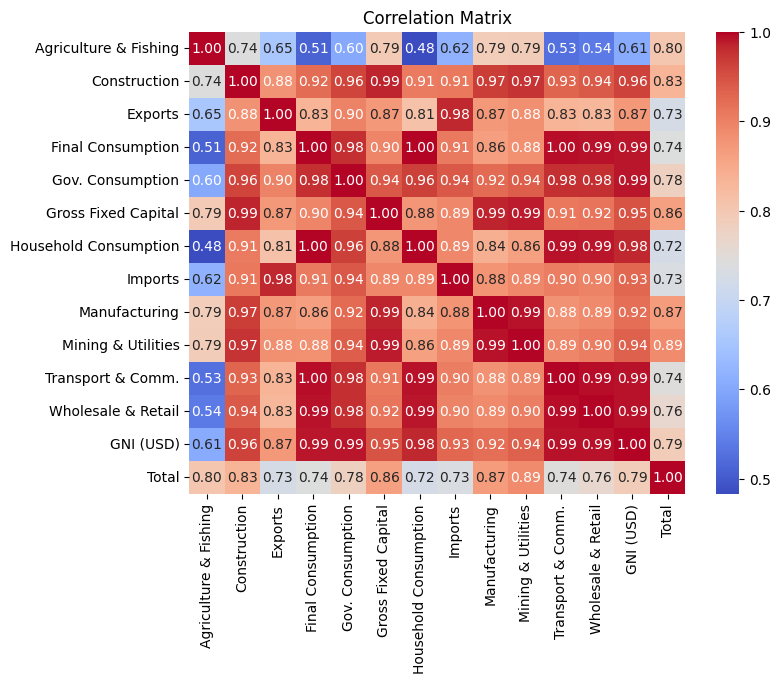

In [78]:
df_corr = df[[
    'Agriculture & Fishing',
    'Construction',
    'Exports',
    'Final Consumption',
    'Gov. Consumption',
    'Gross Fixed Capital',
    'Household Consumption',
    'Imports', 
    'Manufacturing',
    'Mining & Utilities', 
    'Transport & Comm.',
    'Wholesale & Retail',
    'GNI (USD)', 
    'Total']].corr()

plt.figure(figsize=(8, 6))  # Définir la taille de la figure
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title("Correlation Matrix")
plt.show()

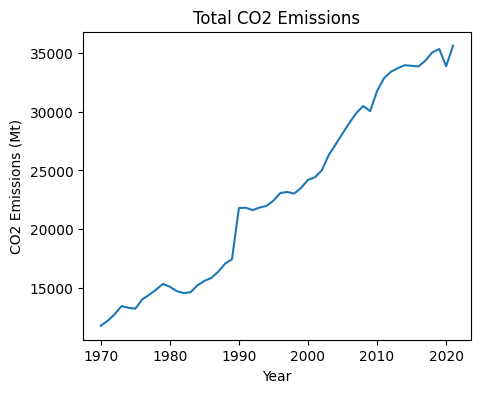

In [79]:
df_total = df[['Year', 'Total']].groupby('Year').sum().reset_index()

plt.figure(figsize=(5, 4))
plt.plot(df_total['Year'], df_total['Total'], label='Total CO2 Emissions')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (Mt)')
plt.title('Total CO2 Emissions')
plt.show() 

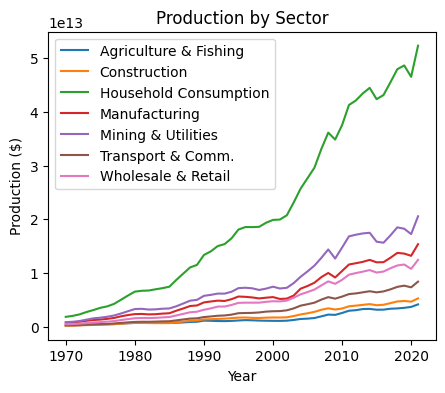

In [80]:
# Group by year and sum the production for each sector and countries
df_prod = df.groupby('Year')[
    ['Agriculture & Fishing', 'Construction', 'Household Consumption', 
     'Manufacturing', 'Mining & Utilities', 'Transport & Comm.', 'Wholesale & Retail']
].sum().reset_index()

# List of sectors
sectors = ['Agriculture & Fishing', 'Construction', 'Household Consumption', 
           'Manufacturing', 'Mining & Utilities', 'Transport & Comm.', 'Wholesale & Retail']

plt.figure(figsize=(5, 4))
for sector in sectors:
    plt.plot(df_prod['Year'], df_prod[sector], label=sector)

plt.xlabel('Year')
plt.ylabel('Production ($)')
plt.title('Production by Sector')
plt.legend()
plt.show()

In [62]:
import geopandas as gpd

['Fiji' 'United Republic of Tanzania' 'Western Sahara' 'Canada'
 'United States of America' 'Kazakhstan' 'Uzbekistan' 'Papua New Guinea'
 'Indonesia' 'Argentina' 'Chile' 'Democratic Republic of the Congo'
 'Somalia' 'Kenya' 'Sudan' 'Chad' 'Haiti' 'Dominican Republic' 'Russia'
 'The Bahamas' 'Falkland Islands' 'Norway' 'Greenland'
 'French Southern and Antarctic Lands' 'East Timor' 'South Africa'
 'Lesotho' 'Mexico' 'Uruguay' 'Brazil' 'Bolivia' 'Peru' 'Colombia'
 'Panama' 'Costa Rica' 'Nicaragua' 'Honduras' 'El Salvador' 'Guatemala'
 'Belize' 'Venezuela' 'Guyana' 'Suriname' 'France' 'Ecuador' 'Puerto Rico'
 'Jamaica' 'Cuba' 'Zimbabwe' 'Botswana' 'Namibia' 'Senegal' 'Mali'
 'Mauritania' 'Benin' 'Niger' 'Nigeria' 'Cameroon' 'Togo' 'Ghana'
 'Ivory Coast' 'Guinea' 'Guinea-Bissau' 'Liberia' 'Sierra Leone'
 'Burkina Faso' 'Central African Republic' 'Republic of the Congo' 'Gabon'
 'Equatorial Guinea' 'Zambia' 'Malawi' 'Mozambique' 'eSwatini' 'Angola'
 'Burundi' 'Israel' 'Lebanon' 'Madagascar'

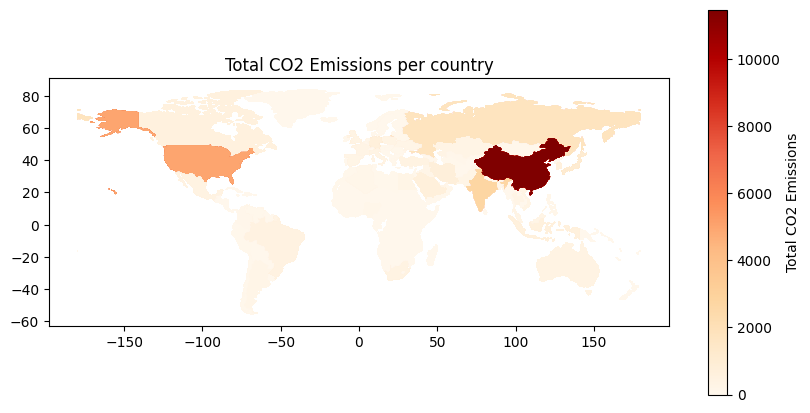

In [82]:
url = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"
gdf = gpd.read_file(url)

df_world = gdf.merge(df, left_on='ADMIN', right_on='Country')

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
df_world.plot(column='Total',
              cmap='OrRd',
              legend=True,
              legend_kwds={'label': "Total CO2 Emissions"},
              ax=ax)

ax.set_title('Total CO2 Emissions per country')
plt.show()

In [64]:
df[['Agriculture & Fishing', 'Manufacturing', 'Mining & Utilities', 'Household Consumption']].shape


(9579, 4)

In [65]:
# columns_to_plot = [
#     'Agriculture & Fishing', 
#     'Manufacturing', 
#     'Mining & Utilities', 
#     'Household Consumption'
# ]

# fig, axes = plt.subplots(2, 2, figsize=(12, 8))
# axes = axes.flatten()  # Convertir les axes en une liste pour itérer facilement

# # Boucle pour créer chaque graphique
# for i, col in enumerate(columns_to_plot):
#     axes[i].scatter( df['Total'], df[col], alpha=0.7)
#     axes[i].set_title(f'{col} vs Total')
#     axes[i].set_xlabel('Total (émissions de CO₂)')
#     axes[i].set_ylabel(col)

# plt.legend()
# plt.show()

## Prediction

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [67]:
Xtrain, Xtest, ytrain, ytest = train_test_split(df_corr.drop(columns=['Total']), df_corr['Total'], test_size=0.2, random_state=42)

In [68]:
model = LinearRegression()
model.fit(Xtrain, ytrain)

ypred = model.predict(Xtest)

print('Mean Squared Error:', mean_squared_error(ytest, ypred))
print('R2 Score:', r2_score(ytest, ypred))

Mean Squared Error: 0.011672071249238533
R2 Score: -3.271483681495198


In [69]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

print('Mean Squared Error:', mean_squared_error(ytest, ypred))
print('R2 Score:', r2_score(ytest, ypred))

Mean Squared Error: 0.005991061774710971
R2 Score: -1.1924748452145604
